## 01 - Señales EEG - Exploración de datos

In [113]:
# Librerías
%reset

from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
import math
from sklearn.metrics import mean_squared_error


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [115]:
# Cargar datos (archivo .csv)
# Descargar a equipo local archivo .csv y luego cargarlo en el colab
# (opción upload - lado izquierdo)

ruta_datos = "/content/EEG_Eye_State_Classification.csv"
datos_eeg = pd.read_csv(ruta_datos)
print(datos_eeg.head())

       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  


In [ ]:
# Cargar datos desde local (archivo .csv)
#uploaded = files.upload()
#nombre_csv = 'EEG_Eye_State_Classification.csv'
#datos_eeg = pd.read_csv(io.BytesIO(uploaded[nombre_csv]))
# print(datos_eeg.tail())

Saving EEG_Eye_State_Classification.csv to EEG_Eye_State_Classification.csv


In [116]:
# Resumen estadistico de los datos -señales EEG- (columnas)
datos_eeg.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


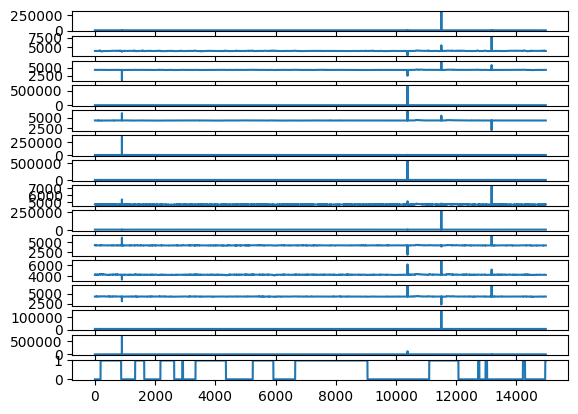

In [117]:
# Visualización
# Señales EEG sin prerpocesamiento

plt.figure()
for i in range(datos_eeg.shape[1]):
  plt.subplot(datos_eeg.shape[1], 1, i+1)
  plt.plot(datos_eeg.values[:, i])
plt.show()


## 02 - Señales EEG - Preprocesamiento de datos

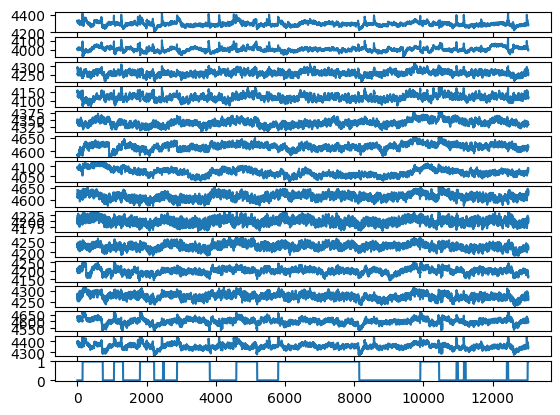

In [118]:
# Eliminación de los valores atípicos

# La determinanción de los valores atípicos se establece como aquellos que se
# encuentran por encima o por debajo de tres desviaciones estándar de la media.
# (Es importante resaltar que existen técnicas de preprocesamiento espacializado
# en el análisis de señales de EEG que permiten conservar la información del
# proceso subyacente)

datos = datos_eeg

nombres_columnas = list(datos.columns)
nombres_columnas.remove('eyeDetection')

for i in nombres_columnas:

  media = np.mean(datos.loc[:, i])
  desv = np.std(datos.loc[:, i])

  datos = datos.loc[(datos[i] > (media - desv*3))]
  datos = datos.loc[(datos[i] < (media + desv*3))]

# Visualización
# Señales EEG con prerpocesamiento
plt.figure()
for i in range(datos.shape[1]):
  plt.subplot(datos.shape[1], 1, i+1)
  plt.plot(datos.values[:, i])
plt.show()


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

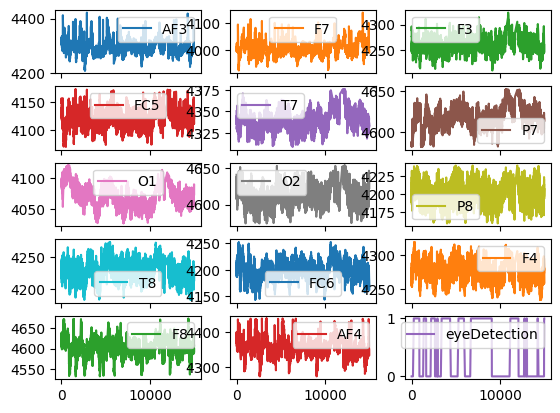

In [119]:
# Visualización datos EEG
datos.plot(subplots=True, layout=(5,3))


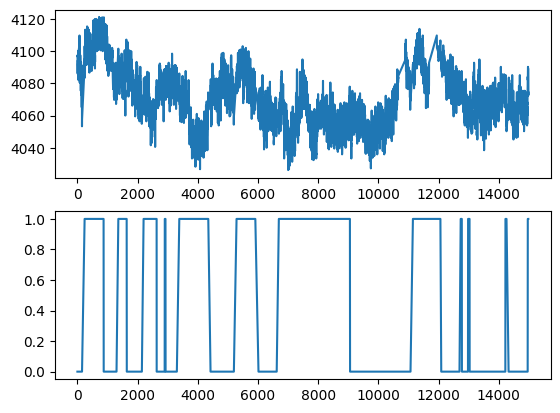

In [120]:
# Visualización en detalle de una señal EEG y la clasificación de ojos abiertos/cerrados

fig, axs = plt.subplots(2)
axs[0].plot(datos.loc[:, "O1"])
axs[1].plot(datos.loc[:, "eyeDetection"])


## 03 - Señales EEG - Datos para Training y Test en señal EEG de canal 01

In [121]:
# función
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#
O1 = np.array(datos.O1)
training_set = O1[:3000]
training_set = np.reshape(training_set, (training_set.shape[0], 1))
test_set = O1[3001:4200]
test_set = np.reshape(test_set, (test_set.shape[0], 1))

# Escalar datos Training
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#
look_back = 15
X_train, y_train = create_dataset(training_set_scaled, look_back)
print(X_train.shape)
print(y_train.shape)

(2985, 15)
(2985,)


## 04 - Señales EEG - Arquitectura RNN

In [130]:
# The RNN architecture
model = Sequential()
model.add(LSTM(units = 100,
               activation = 'relu',
               return_sequences=True,
               input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(units = 1))

model.summary()

model.compile(optimizer='adam',loss='mean_squared_error', metrics='accuracy')
model.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train,epochs=50,batch_size=32)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 15, 100)           40800     
                                                                 
 dropout_10 (Dropout)        (None, 15, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                30200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - 11s 67ms/step - loss: 0.0441 - accuracy: 0.0020
Epoch 2/50
94/94 [==============================] - 8s 87ms/step - loss: 0.0065 -

In [131]:
# Organizar datos para realizar pruebas - test
dataset_total = O1[:5200]
inputs = dataset_total[len(dataset_total)-len(test_set) - look_back:]
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
inputs.shape

#
X_test = []
for i in range(look_back,inputs.shape[0]):
    X_test.append(inputs[i-look_back:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_O1 = model.predict(X_test)
predicted_O1 = sc.inverse_transform(predicted_O1)

38/38 [==============================] - 1s 15ms/step


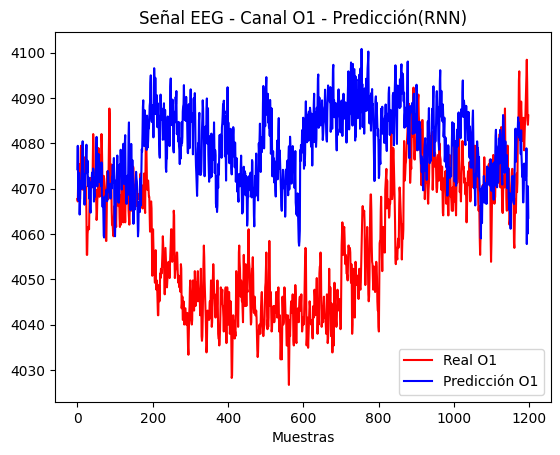

In [132]:
# Visualización de resultados
plt.plot(test_set, color='red',label='Real O1')
plt.plot(predicted_O1, color='blue',label='Predicción O1')
plt.title('Señal EEG - Canal O1 - Predicción(RNN)')
plt.xlabel('Muestras')
plt.legend()
plt.show()